In [3]:
import torch
import numpy as np
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt

import math

In [41]:
# k = 0.6
# p = 1

k = 0.18
p = 0.97 / k

# k = 0.06
# p = 0.997 / k


c = 2*k*k*k / (1 - k*k*p*p)
c_tilte = c / k

def Theta(theta_):
    return theta_ / k + p * math.log(((1+k*p) + (1-k*p)*math.exp(theta_)) / ((1-k*p) + (1+k*p)*math.exp(theta_)))

def u0(theta_):
    return 2*k*c*p*p / ((1+k*k*p*p) +(1-k*k*p*p)*np.cosh(theta_))

def theta(Theta_):
    return optimize.bisect(lambda x : Theta(x) - Theta_, -100., 100.)

def Theta_x(x, t=0, x0=0):
    return p * (x - c_tilte * t + x0)

def u_x(x, t=0):
    return u0(theta(Theta_x(x[i], t, x0=0)))
    

In [42]:
theta(2)

3.0453271959956396

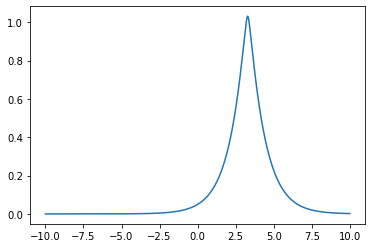

In [45]:
x = np.linspace(-10., 10., num=10000)
u = []
for i in range(len(x)):
    u.append(u0(theta(Theta_x(x[i], 3, x0=0))))
    
#interpolate
# f_inter = interpolate.interp1d(x, u)
    
# plt.plot(x, f_inter(x))
# plt.show()

plt.plot(x, u)
plt.show()

# extrapolate

In [8]:
#extrapolate
def f_extra(x):
    if x <=20. and x >= -20.:
        return f_inter(x)
    else:
        return 0.

In [9]:
f_extra(-20), f_extra(-21)

(array(0.00136706), 0.0)

In [10]:
def u0_x(x):
    return f_extra(x)

L = 0.
def u(x, t, x0=0.):
    return f_extra(x - c_tilte * t + x0)

In [11]:
c_tilte

0.6311032947799343

In [12]:
x = torch.tensor([1, 2])
t = torch.tensor([3, 4])

In [13]:
torch.from_numpy(u(x[0].detach().numpy(), t[0].detach().numpy()))

tensor(0.0308, dtype=torch.float64)

In [14]:
x[0].detach().numpy()

array(1)

In [15]:
u = torch.full(size=(3, 1), fill_value=0., dtype=torch.double)

In [16]:
u[1]

tensor([0.], dtype=torch.float64)

In [23]:
a = np.linspace(-10.0, 10.0, num=100)
b = []
for i in range(len(a)):
    print(Theta(a[i]))
    b.append(Theta(a[i]))
    
print(b)

-124.84286920508013
-122.31761988731607
-119.79237128753134
-117.26712356641727
-114.74187692061723
-112.21663159076442
-109.69138787131324
-107.16614612256369
-104.64090678536502
-102.11567039909303
-99.5904376236238
-97.06520926618568
-94.53998631416046
-92.01476997513487
-89.4895617257799
-86.96436337146461
-84.43917711890562
-81.91400566461621
-79.3888523024636
-76.86372105426996
-74.33861682810745
-71.81354560973033
-69.28851469343864
-66.76353295953552
-64.2386112063466
-61.71376254538655
-59.18900286847839
-56.66435139514018
-54.13983130687754
-51.61547047148102
-49.09130225406985
-46.567366401171796
-44.043709967946114
-41.52038823480496
-38.99746552611965
-36.47501579875442
-33.953122811507036
-31.43187962071116
-28.91138708006183
-26.391750970113314
-23.87307737173244
-21.355465966558246
-18.839001141888378
-16.323741136626293
-13.809705996520979
-11.296865753052252
-8.78513084986413
-6.274347173590851
-3.7642978370155906
-1.2547129476364793
1.2547129476364791
3.7642978370155

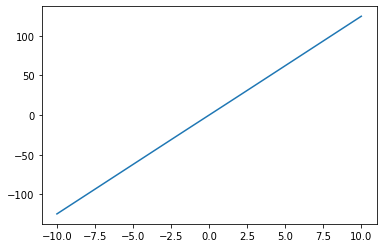

In [24]:
plt.plot(a, b)
plt.show()

In [19]:
c = np.linspace(-15., 15., num=100000)
d = []
for i in range(len(c)):
    x = c[i]
    d.append(scipy.optimize.bisect(Theta, -10., 10.))

NameError: name 'scipy' is not defined

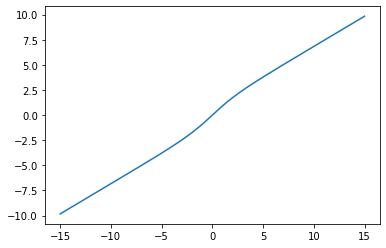

In [77]:
plt.plot(c, d)
plt.show()

In [177]:
a = torch.tensor([1, 2])
a

tensor([1, 2])

In [178]:
a > 2.

tensor([False, False])

In [180]:
a[1] = 3
a

tensor([1, 3])